In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/My Drive/Colab Notebooks/Contraceptive/'

## Import Data and Check Columns

In [ ]:
df = pd.read_csv(root_path+"cmc.csv", names = ['Age', 'W_Education', 'Hus_Education', 'Children','W_Islam','W_Work','Hus_occupation','STD_Living','Media_exposure','Contraceptive'])
df.head(5)

,Age,W_Education,Hus_Education,Children,W_Islam,W_Work,Hus_occupation,STD_Living,Media_exposure,Contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [ ]:
df.columns,df.dtypes,df.shape

(Index(['Age', 'W_Education', 'Hus_Education', 'Children', 'W_Islam', 'W_Work',
        'Hus_occupation', 'STD_Living', 'Media_exposure', 'Contraceptive'],
       dtype='object'),
 Age               int64
 W_Education       int64
 Hus_Education     int64
 Children          int64
 W_Islam           int64
 W_Work            int64
 Hus_occupation    int64
 STD_Living        int64
 Media_exposure    int64
 Contraceptive     int64
 dtype: object,
 (1473, 10))

## Data Cleaning

### Check info, null value และ เปลี่ยน info ให้สอดคล้องกับ data ใน data description

In [ ]:
df.isnull().any()

Age               False
W_Education       False
Hus_Education     False
Children          False
W_Islam           False
W_Work            False
Hus_occupation    False
STD_Living        False
Media_exposure    False
Contraceptive     False
dtype: bool

<h5> ไม่มีค่า null ใน dataset นี้ </h5>

In [ ]:
columns = []
for col in df.columns:
  columns.append(col)
for col in columns:
    if col == 'Age' or col == 'Children':
        pass
    else:
        df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             1473 non-null   int64   
 1   W_Education     1473 non-null   category
 2   Hus_Education   1473 non-null   category
 3   Children        1473 non-null   int64   
 4   W_Islam         1473 non-null   category
 5   W_Work          1473 non-null   category
 6   Hus_occupation  1473 non-null   category
 7   STD_Living      1473 non-null   category
 8   Media_exposure  1473 non-null   category
 9   Contraceptive   1473 non-null   category
dtypes: category(8), int64(2)
memory usage: 35.9 KB


<h5> ถึงแม้ว่าเราจะรู้ว่าไม่มีค่า null แต่ไม่ได้แปลว่า จะไม่มี ข้อมูล dataset ที่ผิดรูปแบบ </h5>

### Check Category Feature

In [ ]:
cols_to_check = df.select_dtypes(include='category').columns
for i,col in enumerate(cols_to_check):
    print(df.groupby(col)[cols_to_check[i]].count())
    print("--------------------------------------")

W_Education
1    152
2    334
3    410
4    577
Name: W_Education, dtype: int64
--------------------------------------
Hus_Education
1     44
2    178
3    352
4    899
Name: Hus_Education, dtype: int64
--------------------------------------
W_Islam
0     220
1    1253
Name: W_Islam, dtype: int64
--------------------------------------
W_Work
0     369
1    1104
Name: W_Work, dtype: int64
--------------------------------------
Hus_occupation
1    436
2    425
3    585
4     27
Name: Hus_occupation, dtype: int64
--------------------------------------
STD_Living
1    129
2    229
3    431
4    684
Name: STD_Living, dtype: int64
--------------------------------------
Media_exposure
0    1364
1     109
Name: Media_exposure, dtype: int64
--------------------------------------
Contraceptive
1    629
2    333
3    511
Name: Contraceptive, dtype: int64
--------------------------------------


<h5> Feature ประเภท category มีค่าตรงตาม information ที่ให้มา แต่ว่าจากจำนวน Instant ของ Class ทำให้เห็นว่าถึงแม้ </br> Class 1, 3 จะมีค่าใกล้เคียงกัน แต่ Class 1,2 มีความแตกต่างกันเกือบครึ่ง ดังนั้นอาจมีการใช้ Imbalance 


### Check Numeric Feature

In [ ]:
df.Age.unique(), df.Age.max(), df.Age.min()

(array([24, 45, 43, 42, 36, 19, 38, 21, 27, 44, 26, 48, 39, 37, 46, 40, 29,
        31, 33, 25, 28, 47, 32, 49, 34, 20, 22, 30, 23, 35, 41, 17, 18, 16],
       dtype=int64),
 49,
 16)

In [ ]:
df.Children.unique(), df.Children.max(), df.Children.min()

(array([ 3, 10,  7,  9,  8,  0,  6,  1,  2,  4,  5, 12, 11, 13, 16],
       dtype=int64),
 16,
 0)

<h5> ตัวเลขเป็นข้อมูลที่ตรงกับ ข้อมูลหลักตามเกณฑ์ที่ให้มา เช่น ไม่มีเด็กอายุ -10 หรือ คนอายุ -300 เป็นต้น </h5>

### จัดการกับข้อมูลซ้ำ

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1425, 10)

#### จะสั่งเกตว่าข้อมูลถูกลบไป 48 ข้อมูลหมายความว่ามีข้อมูลซ้ำกัน 48 ข้อมูล

## หาค่า Outlier

### ค่าสถิติเบื้องต้น

In [ ]:
df.describe()

,Age,Children
count,1425.000000,1425.000000
mean,32.504561,3.284912
std,8.215933,2.377671
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,5.000000
max,49.000000,16.000000


<h5> ค่า mean กับค่า med (50%) นั้นไม่ค่อยมีความแตกต่างกันของทั้ง 2 feature </h5>

### ลักษณะของข้อมูล

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


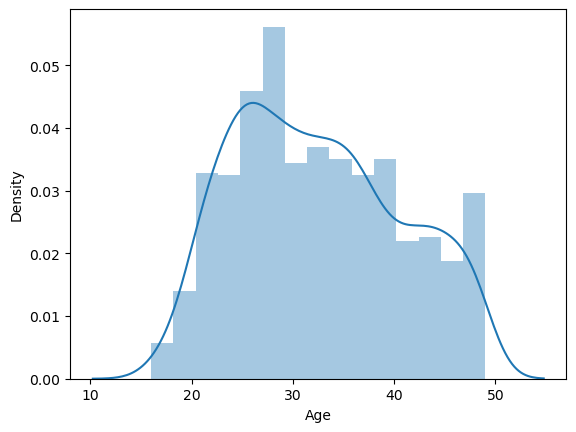

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


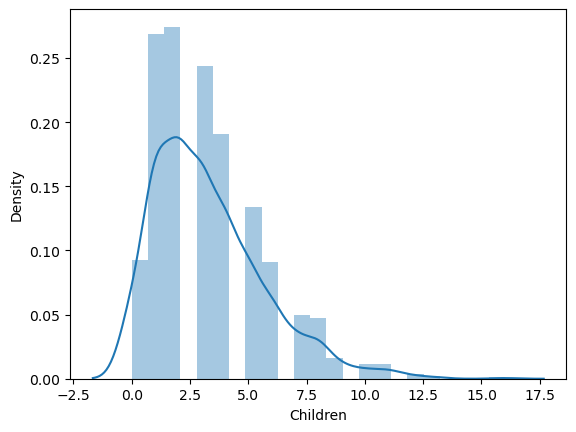

In [ ]:
for i in df.describe().columns:
   sns.distplot(df[i])
   plt.show()

In [ ]:
for i in df.describe().columns:
    if (df[i].mode()[0]>df[i].median()>df[i].mean()[0]): 
        print(i+" is left-Skewed")
    elif not((df[i].mode()[0]>df[i].median()>df[i].mean()[0])):
        print(i+ " is right-Skewed")
    else:
        print("Symetric")

Age is right-Skewed
Children is right-Skewed


C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


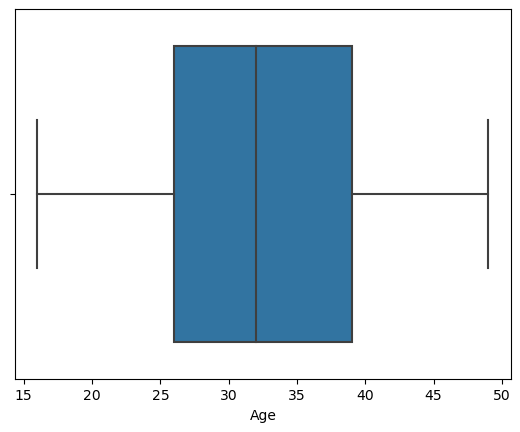

C:\Users\EMMIE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


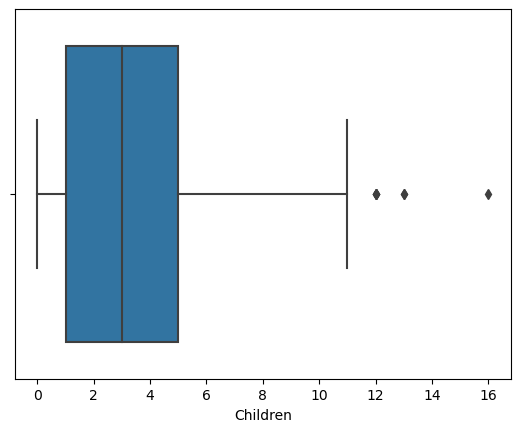

In [ ]:
for i in df.describe().columns:
   sns.boxplot(df[i])
   plt.show()

<h5> จะเห็นได้ว่า Children มีค่า outlier อยู่ยกตัวอย่างเช่น Children 16  </h5>
<h5> ทั้ง 2 Feature นั้นเป็น Feature ที่เบ้ขวา </h5>

### หาค่าผิดปกติด้วย IDR

In [ ]:
q1,q3 = np.percentile(df.Children,[25,75]) ## หา q1,q3
iqr = q3-q1
print('Q1: {}'.format(q1))
print('Q3: {}'.format(q3))
print('IQR: {}'.format(iqr))

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
print('Lower: {:.2f} \nUpper: {:.2f}'.format(lower,upper))

Q1: 1.0
Q3: 5.0
IQR: 4.0
Lower: -5.00 
Upper: 11.00


#### ข้อมูลที่อยู่ระหว่างช่วง lower-upper ถือว่าใช้ได้

In [ ]:
filter = df.Children>upper
df[filter]

,Age,W_Education,Hus_Education,Children,W_Islam,W_Work,Hus_occupation,STD_Living,Media_exposure,Contraceptive
182,42,1,3,12,1,1,3,3,0,1
519,43,2,4,13,1,1,2,3,0,2
653,48,4,4,16,1,1,1,4,0,3
675,49,4,3,13,1,1,1,4,0,3
1013,38,1,2,12,1,1,2,3,0,1
1139,47,2,3,12,1,1,3,1,0,1
1142,42,1,3,12,1,1,2,4,0,1


In [ ]:
df.drop(df[filter].index,inplace=True)
df.shape

(1418, 10)

<h5> จาก (1425, 10) ที่ผ่านการลบข้อมูลซ้ำ เหลือ (1418,10) แปลว่าลบข้อมูลออกไปอีก 7 รวมจากทั้งหมดเป็น 55 ข้อมูล </h5>

### วนซ้ำ

In [ ]:
q1,q3 = np.percentile(df.Children,[25,75]) ## หา q1,q3
iqr = q3-q1
print('Q1: {}'.format(q1))
print('Q3: {}'.format(q3))
print('IQR: {}'.format(iqr))

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
print('Lower: {:.2f} \nUpper: {:.2f}'.format(lower,upper))

Q1: 1.0
Q3: 5.0
IQR: 4.0
Lower: -5.00 
Upper: 11.00


In [ ]:
filter = df.Children>upper
df[filter]

,Age,W_Education,Hus_Education,Children,W_Islam,W_Work,Hus_occupation,STD_Living,Media_exposure,Contraceptive


<h5> ไม่มีค่า outlier ใน feature Children แล้ว